___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

[2, 1, 6, 5, 2, 3, 2, 1, 6, 3, 4, 1, 4, 4, 6, 6, 1, 1, 3, 5, 2, 2, 2, 3, 4, 1, 4, 4, 5, 1, 3, 1, 5, 5, 1, 1, 2, 1, 2, 2, 3, 5, 5, 6, 2, 1, 2, 3, 6, 1, 2, 2, 5, 6, 2, 4, 2, 3, 6, 3, 5, 1, 6, 6, 4, 5, 3, 3, 1, 3, 2, 5, 4, 3, 5, 5, 3, 5, 2, 1, 4, 6, 6, 2, 2, 3, 3, 2, 6, 5, 6, 6, 6, 6, 6, 3, 6, 4, 2, 2, 5, 4, 1, 4, 1, 6, 5, 6, 2, 3, 2, 2, 6, 1, 2, 3, 2, 2, 4, 2, 1, 5, 2, 5, 4, 5, 1, 4, 5, 2, 2, 3, 2, 6, 5, 1, 2, 4, 2, 4, 4, 6, 4, 1, 1, 6, 3, 6, 2, 4, 5, 1, 6, 6, 5, 5, 1, 1, 6, 1, 2, 1, 4, 3, 1, 1, 5, 5, 4, 5, 3, 1, 5, 5, 1, 5, 3, 2, 2, 2, 1, 5, 3, 2, 2, 2, 1, 4, 4, 6, 6, 2, 3, 5, 3, 2, 6, 5, 3, 4, 5, 2, 3, 6, 2, 3, 5, 2, 5, 6, 4, 2, 1, 1, 4, 3, 1, 6, 3, 6, 3, 5, 6, 2, 2, 3, 5, 4, 1, 3, 5, 6, 2, 6, 2, 3, 2, 5, 2, 1, 2, 1, 6, 2, 4, 6, 5, 4, 6, 2, 4, 1, 6, 1, 3, 3, 5, 2, 3, 4, 4, 6, 1, 1, 3, 4, 6, 2, 3, 3, 3, 1, 3, 1, 5, 2, 1, 5, 6, 5, 3, 6, 2, 3, 5, 5, 3, 6, 5, 2, 5, 5, 4, 6, 3, 6, 2, 2, 5, 5, 5, 5, 6, 1, 1, 1, 4, 2, 5, 4, 2, 6, 4, 2, 2, 4, 2, 5, 4, 5, 1, 6, 2, 5, 2, 5, 6, 4, 5, 2, 4, 4, 2, 

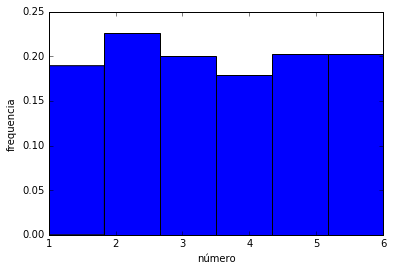

In [3]:
#A
listadado = []
i = 0 #contador recebe zero 

while i <= 1000:
    dado = randint (1,7) #gerar numeros aleatorios de 1 a 6
    listadado.append(dado)
    i+=1

print (listadado)

plt.hist(listadado,6, normed=True)
plt.axis([1,6,0,0.25])
plt.xlabel("número")
plt.ylabel("frequencia")
plt.show()

    

## B

A probabilidade teórica diz que todos os 6 lados deveriam cair o mesmo número de vezes e então no histograma todas as frequencias seriam iguais. No entanto, como podemos observar através do histograma gerado, isso não ocorre e na realidade isso provavelmente não ocorreria também. No entanto, quanto maior o número de jogadas, mais o histograma tende a se normalizar e todas as frequencias se tornarem iguais, dessa forma, é como se a probabilidade teórica fosse um limite para o número de tentativas tendendo ao infinito.  

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [6]:
#A
soma = 0
i = 0

while i <= 1000:
    d1 = randint (1,7)
    d2 = randint (1,7)
    if d1 + d2 == 7: 
        soma+=1
        i+=1
    else:
        i+=1
probabilidade = soma*100/i
print("A probabilidade de se obter soma 7 é: {0:.2f}%".format(probabilidade))

A probabilidade de se obter soma 7 é: 16.48%


## B

A probabilidade é a mesma do exercicio anterior, pois após jogar o primeiro dado vc só terá 1/6 de chance de que a soma seja 7. Pois em um dado de 6 faces somente um numero de um dado e um numero do outro fara com que de certo a soma.  

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [9]:
trocou = 0 
ficou = 0 

for i in range (0,10000):
    premiada = randint (1,4)
    escolhida = randint (1,4)
    
    if premiada != escolhida:
        trocou +=1
        
    else:
        ficou +=1
        
print ("Numero de vezes que ganhou trocando {0} ou {1}%".format(trocou,trocou/100))
print ("Numero de vezes que ganhou ficando {0} ou {1}%".format(ficou,ficou/100))

Numero de vezes que ganhou trocando 6669 ou 66.69%
Numero de vezes que ganhou ficando 3331 ou 33.31%
